In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision Tree and Ensemble Learning

## Decision Tree

A decision tree may be described as a set of decisions/categorization steps that help you to classify your data into predefined classes. This helps you to solve a classification problem. 

For example, consider the following data set related to playing tennis in a specific day based on weather condition parameters. Based on the provided parameters, we are need to come up with a decision tree that helps us to decide whether the player plays tennis on a specific day based on four weather related parameters including outlook, temperature, humidity and wind condition.

In [2]:
data_dict = {
    'Outlook' : ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny','Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
    ,'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild','Mild','Mild', 'Hot', 'Mild']
    ,'Humidity' : ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High','Normal','Normal', 'Normal', 'High', 'Normal', 'High']
    ,'Wind': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']
    ,'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
tennis_data = pd.DataFrame(data_dict, columns=data_dict.keys())
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


The following decision three helps us to use a set of decisions to solve our classification problem.
![alt text](Figures/DT1.jpg "Decison tree for tennis play problem")

### Order of decision; why Outlook is the first question/decision?

The main question is why outlook was chosen as the first decision level. The answer is that the amount of **Information Grain** that is resolved by this decision is higher that the other decisions. This can be quantified using entropy which is a measure of randomness. Higher entropy means higher randomness and the amount of reduction in randomness based on a decision is called information gain.

In [3]:
%%latex

Entropy = $-\sum_{i=1}^{n} P_i\times Log_b(P_i)$

<IPython.core.display.Latex object>

Note: corresponding units of entropy are the bits for b = 2, nats for b = e, and bans for b = 10 where b is the base of the logarithm function

In [4]:
def entropy_calculate(prob_list):
    
    entropy = 0
    for item in prob_list:
        entropy -= item * np.log2(item) 
    return entropy

### Entropy of the entire system
Entropy of the entire system:
14 observations: 9 Yes and 5 No

In [5]:
cases,counts = np.unique(tennis_data.PlayTennis,return_counts=True)
P = [count/len(tennis_data) for count in counts]
print('Probabilities of %s and %s are %.3f, %.3f respectively'%(cases[0],cases[1],P[0],P[1]))

entropy_entire = entropy_calculate(P)

print('Entire syetems entropy is %.3f bits'%entropy_entire)

Probabilities of No and Yes are 0.357, 0.643 respectively
Entire syetems entropy is 0.940 bits


### Information Gain

Lets calculate reduction in entropy for each decision. For each decision, entropy is calculated for each case under that decision and the a probability weighted average is calculated.

#### Outlook decision

In [6]:
cases_outlook,counts_outlook= np.unique(tennis_data.Outlook,return_counts=True)
P_outlook = [count/len(tennis_data) for count in counts_outlook]
print('For outlook:')
for case, prob in zip(cases_outlook,P_outlook):
    print('\tProbabality of %s is %.3f'%(case, prob))

For outlook:
	Probabality of Overcast is 0.286
	Probabality of Rainy is 0.357
	Probabality of Sunny is 0.357


In [7]:
entropy_outlook={}
total_entropy_outlook=0
for case, prob in zip(cases_outlook,P_outlook):
    cases,counts = np.unique(tennis_data.PlayTennis[tennis_data.Outlook==case],return_counts=True)
    P = [count/len(tennis_data[tennis_data.Outlook==case]) for count in counts]
    entropy_outlook[case]=entropy_calculate(P)
    total_entropy_outlook += entropy_calculate(P)*prob

for case, entropy in entropy_outlook.items():
    print('Entropy for %s is %.2f'%(case,entropy))
print('\nEntropy at Outlook decision level is %.3f'%total_entropy_outlook)
print('\nInformation gain is %.3f'%(entropy_entire- total_entropy_outlook))

Entropy for Overcast is 0.00
Entropy for Rainy is 0.97
Entropy for Sunny is 0.97

Entropy at Outlook decision level is 0.694

Information gain is 0.247


#### Temperature Decision

In [8]:
cases_temperature,counts_temperature= np.unique(tennis_data.Temperature,return_counts=True)
P_temperature = [count/len(tennis_data) for count in counts_temperature]
print('For temperature:')
for case, prob in zip(cases_temperature,P_temperature):
    print('\tProbabality of %s is %.3f'%(case, prob))

For temperature:
	Probabality of Cool is 0.286
	Probabality of Hot is 0.286
	Probabality of Mild is 0.429


In [9]:
entropy_temperature={}
total_entropy_temperature=0
for case, prob in zip(cases_temperature,P_temperature):
    cases,counts = np.unique(tennis_data.PlayTennis[tennis_data.Temperature==case],return_counts=True)
    P = [count/len(tennis_data[tennis_data.Temperature==case]) for count in counts]
    entropy_temperature[case]=entropy_calculate(P)
    total_entropy_temperature += entropy_calculate(P)*prob

for case, entropy in entropy_temperature.items():
    print('Entropy for %s is %.2f'%(case,entropy))
print('\nEntropy at Temperature decision level is %.3f'%total_entropy_temperature)
print('\nInformation gain is %.3f'%(entropy_entire- total_entropy_temperature))

Entropy for Cool is 0.81
Entropy for Hot is 1.00
Entropy for Mild is 0.92

Entropy at Temperature decision level is 0.911

Information gain is 0.029


#### Wind Decision

In [10]:
cases_wind,counts_wind= np.unique(tennis_data.Wind,return_counts=True)
P_wind = [count/len(tennis_data) for count in counts_wind]
print('For wind:')
for case, prob in zip(cases_wind,P_wind):
    print('\tProbabality of %s is %.3f'%(case, prob))

For wind:
	Probabality of False is 0.571
	Probabality of True is 0.429


In [11]:
entropy_wind={}
total_entropy_wind=0
for case, prob in zip(cases_wind,P_wind):
    cases,counts = np.unique(tennis_data.PlayTennis[tennis_data.Wind==case],return_counts=True)
    P = [count/len(tennis_data[tennis_data.Wind==case]) for count in counts]
    entropy_wind[case]=entropy_calculate(P)
    total_entropy_wind += entropy_calculate(P)*prob

for case, entropy in entropy_wind.items():
    print('Entropy for %s is %.2f'%(case,entropy))
print('\nEntropy at Wind decision level is %.3f'%total_entropy_wind)
print('\nInformation gain is %.3f'%(entropy_entire- total_entropy_wind))

Entropy for False is 0.81
Entropy for True is 1.00

Entropy at Wind decision level is 0.892

Information gain is 0.048


#### Humidity Decision

In [12]:
cases_humidity,counts_humidity= np.unique(tennis_data.Humidity,return_counts=True)
P_humidity = [count/len(tennis_data) for count in counts_humidity]
print('For humidity:')
for case, prob in zip(cases_humidity,P_humidity):
    print('\tProbabality of %s is %.3f'%(case, prob))

For humidity:
	Probabality of High is 0.500
	Probabality of Normal is 0.500


In [13]:
entropy_humidity={}
total_entropy_humidity=0
for case, prob in zip(cases_humidity,P_humidity):
    cases,counts = np.unique(tennis_data.PlayTennis[tennis_data.Humidity==case],return_counts=True)
    P = [count/len(tennis_data[tennis_data.Humidity==case]) for count in counts]
    entropy_humidity[case]=entropy_calculate(P)
    total_entropy_humidity += entropy_calculate(P)*prob

for case, entropy in entropy_humidity.items():
    print('Entropy for %s is %.2f'%(case,entropy))
print('\nEntropy at Humidity decision level is %.3f'%total_entropy_humidity)
print('\nInformation gain is %.3f'%(entropy_entire- total_entropy_humidity))

Entropy for High is 0.99
Entropy for Normal is 0.59

Entropy at Humidity decision level is 0.788

Information gain is 0.152


As shown above, by choosing outlook as the first decision/question, the highest reduction in entropy/randomness is achieved that corresponds to the highest **Information Gain**

## Titanic Example

In [14]:
import urllib3
import pandas as pd
import certifi
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

### Loading data using BeautifulSoup and urlib3 as the htm client

In [15]:
html_address = 'https://www.encyclopedia-titanica.org/titanic-passengers-and-crew/'

In [16]:
http = urllib3.PoolManager(maxsize=10, cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
r = http.request('GET', html_address) 

In [17]:
soup = BeautifulSoup(r.data, 'html.parser')

In [18]:
table = soup.find('table')
data = pd.read_html(str(table),flavor='bs4')[0] # Note that the flavor cotains information about the encoding as well
http.clear()
data.head()

,Name,Age,Class/Dept,Ticket,Joined,Job,Boat [Body],Unnamed: 7
0,"ABBING, Mr Anthony",42,3rd Class Passenger,5547£7 11s,Southampton,Blacksmith,NaN,NaN
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,CA2673£20 5s,Southampton,NaN,A,NaN
2,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,CA2673£20 5s,Southampton,Jeweller,[190],NaN
3,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,CA2673£20 5s,Southampton,Scholar,NaN,NaN
4,"ABBOTT, Mr Ernest Owen",21,Victualling Crew,NaN,Southampton,Lounge Pantry Steward,NaN,NaN


In [19]:
data_trim = data[['Name', 'Age', 'Class/Dept', 'Boat [Body]']]
data_trim.head()

,Name,Age,Class/Dept,Boat [Body]
0,"ABBING, Mr Anthony",42,3rd Class Passenger,NaN
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,A
2,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,[190]
3,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,NaN
4,"ABBOTT, Mr Ernest Owen",21,Victualling Crew,NaN


### Processing data

Special characters are removed and then the age is change to float and ages below 1 year are converted to a representative float number

In [20]:
data_trim['Name'] = data_trim['Name'].map(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
data_trim['Boat [Body]'] = data_trim['Boat [Body]'].map(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
def process_age(value):
    if 'm' in value:
        return float(re.findall(r'-?\d+\.?\d*',value)[0])/12
    else:
        return(float(value)) 
data_trim['Age'] = data_trim['Age'].map(str).apply(process_age)

In [21]:
data_trim.head()

,Name,Age,Class/Dept,Boat [Body]
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A
2,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190]
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan
4,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,nan


#### Categorize passengers and crews

In [22]:
def categorizer(value):
    if 'PASSENGER' in value.upper():
        return 'Passenger'
    else:
        return 'Crew'
data_trim['Crew/Passenger'] = data_trim['Class/Dept'].map(str).apply(categorizer)
data_trim.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Passenger
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,Passenger
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger
2,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,Passenger
4,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,nan,Crew


#### Check passenger ticket class

In [23]:
def get_passenger_class(value):
    if 'PASSENGER' in value.upper():
        return value.split(' ')[0]
    else:
        return 'Crew'
data_trim['Class'] = data_trim['Class/Dept'].map(str).apply(get_passenger_class)
data_trim.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Passenger,Class
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,Passenger,3rd
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd
2,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,Passenger,3rd
4,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,nan,Crew,Crew


#### Check Adult/Child

In [24]:
def check_adult(age):
    if age > 18:
        return 'Adult'
    else:
        return 'Child'
data_trim['Adult/Child'] = data_trim['Age'].apply(check_adult)
data_trim.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Passenger,Class,Adult/Child
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,Passenger,3rd,Adult
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd,Adult
2,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd,Child
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,Passenger,3rd,Child
4,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,nan,Crew,Crew,Adult


#### Check Gender

In [25]:
def check_gender(name):
    firstname = name[name.index(',')+2:]
    salutation = firstname.split(' ')[0]
    if salutation.upper() in ['MR', 'MASTER']:
        return 'Male'
    else:
        return 'Female'

data_trim['Gender'] = data_trim['Name'].map(str).apply(check_gender)
data_trim.head()   

,Name,Age,Class/Dept,Boat [Body],Crew/Passenger,Class,Adult/Child,Gender
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,Passenger,3rd,Adult,Male
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd,Adult,Female
2,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd,Child,Male
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,Passenger,3rd,Child,Male
4,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,nan,Crew,Crew,Adult,Male


In [26]:
def check_survival(value):
    if value.strip()=='nan' or '[' in value:
        return 0
    else:
        return 1
data_trim['Survival'] = data_trim['Boat [Body]'].map(str).apply(check_survival)
data_trim.head()   

,Name,Age,Class/Dept,Boat [Body],Crew/Passenger,Class,Adult/Child,Gender,Survival
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,Passenger,3rd,Adult,Male,0
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd,Adult,Female,1
2,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd,Child,Male,0
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,Passenger,3rd,Child,Male,0
4,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,nan,Crew,Crew,Adult,Male,0


### Check the importance of each feature

In [27]:
def entropy_calculate(prob_list):
    
    entropy = 0
    for item in prob_list:
        entropy -= item * np.log2(item) 
    return entropy

In [28]:
def information_gain(feature, data, initial_entropy):
    print('Information gain analysis for {}'.format(feature))
    probability_l1 = data.groupby([feature])['Survival'].count()/len(data)
    entropy_feature=0
    for item, probabality in probability_l1.items():
        print('\tProbability of {}:'.format(item), probabality)
        probability_l2 = data[data[feature]==item].groupby(['Survival'])['Survival'].count()/len(data[data[feature]==item])

        entropy_feature += entropy_calculate(probability_l2) * probabality
    print('\n\tEntropy of feature: %.3f'%(entropy_feature))
    print('\tInformation gain: %.3f'%(initial_entropy - entropy_feature))

### Information gain analysis

In [29]:
probability_initial = data_trim.groupby(['Survival'])['Survival'].count()/len(data_trim)
initial_entropy = entropy_calculate(probability_initial)
print('Initial entropy: %.3f'%(initial_entropy))

Initial entropy: 0.815


In [30]:
information_gain(feature='Crew/Passenger', data=data_trim, initial_entropy=initial_entropy)

Information gain analysis for Crew/Passenger
	Probability of Crew: 0.4543987086359968
	Probability of Passenger: 0.5456012913640033

	Entropy of feature: 0.772
	Information gain: 0.043


In [31]:
information_gain(feature='Class', data=data_trim, initial_entropy=initial_entropy)

Information gain analysis for Class
	Probability of 1st: 0.14124293785310735
	Probability of 2nd: 0.11824051654560129
	Probability of 3rd: 0.2861178369652946
	Probability of Crew: 0.4543987086359968

	Entropy of feature: 0.738
	Information gain: 0.077


In [32]:
information_gain(feature='Adult/Child', data=data_trim, initial_entropy=initial_entropy)

Information gain analysis for Adult/Child
	Probability of Adult: 0.880548829701372
	Probability of Child: 0.11945117029862792

	Entropy of feature: 0.813
	Information gain: 0.003


In [33]:
information_gain(feature='Gender', data=data_trim, initial_entropy=initial_entropy)

Information gain analysis for Gender
	Probability of Female: 0.23284907183212267
	Probability of Male: 0.7671509281678773

	Entropy of feature: 0.702
	Information gain: 0.113


### Pick features and lable to construct the decision tree

In [34]:
training_data = data_trim[['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender','Survival']]
training_data.head()

,Age,Crew/Passenger,Class,Adult/Child,Gender,Survival
0,42.0,Passenger,3rd,Adult,Male,0
1,39.0,Passenger,3rd,Adult,Female,1
2,16.0,Passenger,3rd,Child,Male,0
3,13.0,Passenger,3rd,Child,Male,0
4,21.0,Crew,Crew,Adult,Male,0


### Process categorical variables to numerical

In [35]:
category_map ={}
for column in ['Crew/Passenger','Class','Adult/Child','Gender']:
    category_map[column] = dict( enumerate(training_data[column].astype('category').cat.categories) )
    training_data[column] = training_data[column].astype('category').cat.codes

In [36]:
training_data.head()

,Age,Crew/Passenger,Class,Adult/Child,Gender,Survival
0,42.0,1,2,0,1,0
1,39.0,1,2,0,0,1
2,16.0,1,2,1,1,0
3,13.0,1,2,1,1,0
4,21.0,0,3,0,1,0


In [37]:
training_data.dropna(inplace=True)
training_data.reset_index(drop=True, inplace=True)
print('Total number of valid records: {}'.format(len(training_data)))

Total number of valid records: 2449


### Split to train and test data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train, test = train_test_split(training_data, test_size=0.2)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [40]:
print('Total number of records used for training: {}\nTotal number of records used for testin: {}'.format(len(train),len(test)))

Total number of records used for training: 1959
Total number of records used for testin: 490


### Build a decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
X = train[['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender']]
y = train[['Survival']]

In [43]:
clf = DecisionTreeClassifier(max_leaf_nodes=20, criterion='entropy')

In [44]:
clf = clf.fit(X, y)

In [45]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

- class_weight: A dictionary to provide user defined weights for each feature

- criterion: The criterion is the method used to decide with label and what decision needs to be made. gini impurity and information gain/entropy are the two main methods

- max_depth: It determines the maximum depth/layer from the root of the tree to the finest leaf

- max_features: if you want you can ask the algorithm to use a limited number of features based on their importance. This could be a dimension reduction approach that can simplify the tree

- max_leaf_nodes: The max number of end nodes that is another stopping criteria for the decision tree

- min_impurity_split: The minimum amount of impurity split percentage that result in generating another branch. In case of information gain, this will be measured by the amount/percentage of reduction in entropy.

- min_samples_leaf: Minimum number of samples that should exist in a subset created by a decision. If less than this number, the branch gets pruned and the previous level of the tree will be kept

- min_samples_split: Minimum number of samples in a tree level to consider further splitting and decision making

- min_weight_fraction_leaf: similar to min_samples_leaf but expressed as a fraction of whole data

- random_state, presort and splitter are performance related settings and do not affect the algorithm

In [46]:
clf.feature_importances_

array([0.20502926, 0.        , 0.28082862, 0.        , 0.51414211])

As can be seen above, the importance analysis confirms the result of information gain analysis that Gender is the most important feature. 

### Tree visualization

In [47]:
from sklearn import tree

In [48]:
with open ('Outputs/Titanic.dot', 'w') as f:
    f = tree.export_graphviz(clf, feature_names=['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender'], out_file=f)

In [49]:
# conda install -c conda-forge python-graphviz
from graphviz import Source

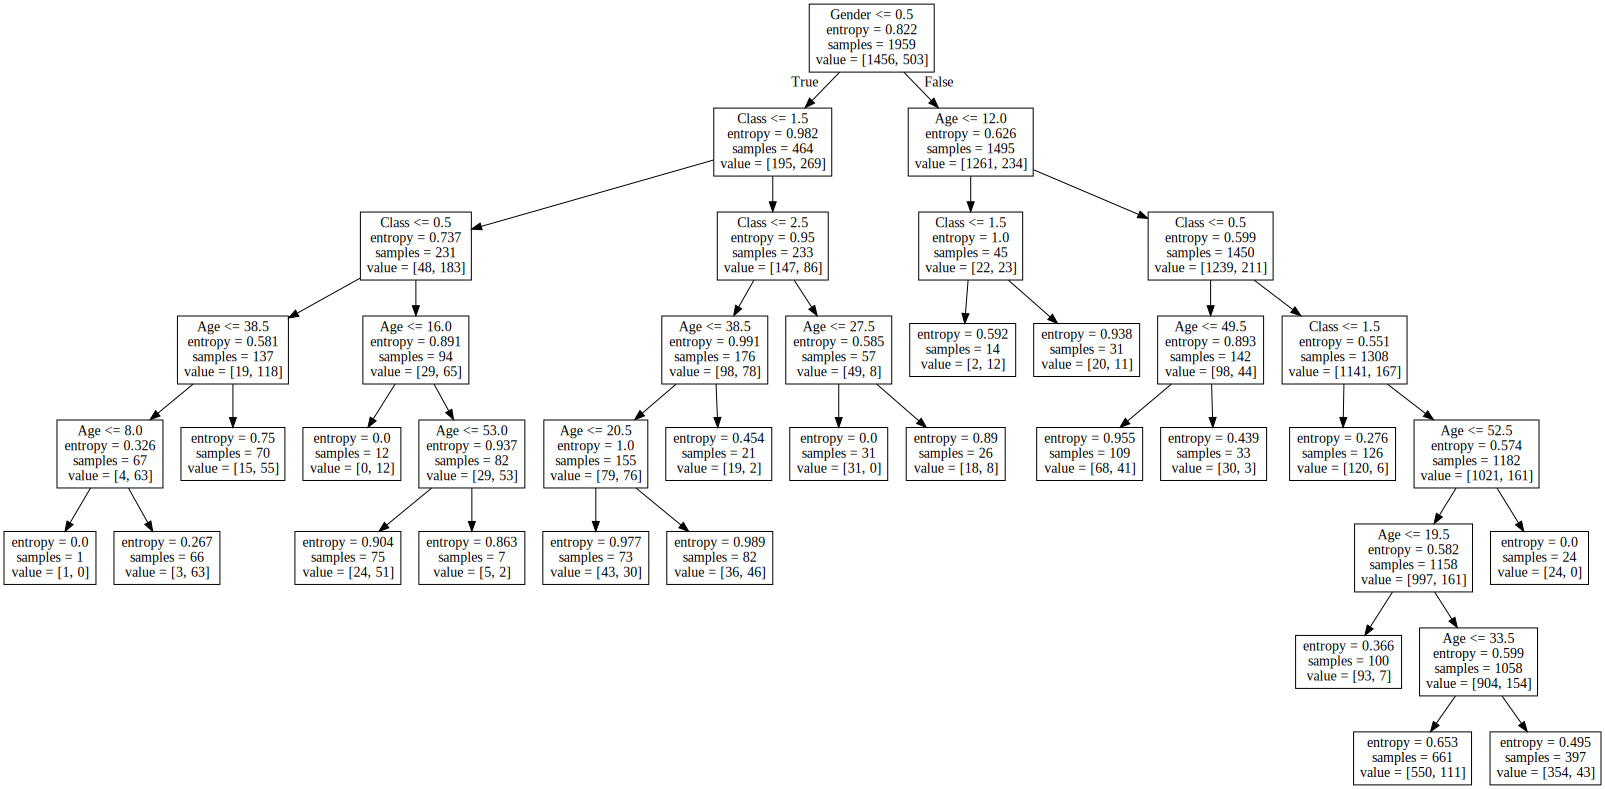

In [50]:
s = Source.from_file('Outputs/Titanic.dot')
s.render() # saves a pdf file
s

### Evaluate the tree

#### Using train and test data sets

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
predictions = clf.predict(test.drop(['Survival'], axis=1))

In [53]:
accuracy_score(test['Survival'],predictions)

0.8224489795918367

It is possible to tune the decision tree parameters based on the accuracy measure. For example the max_leaf_nodes can be tuned to find the maximum accuracy.

#### K-fold cross validation

In [54]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [55]:
X = training_data[['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender']]
y = training_data[['Survival']]

In [56]:
cross_val_score(clf, X, y, cv=5)

array([0.82244898, 0.81428571, 0.79795918, 0.78367347, 0.81799591])

## Ensemble learning to avoid over fitting

The ensemble learning relies on using multiple instances of a machine learning algorithm (i.e. decision tree) that are trained with different subsets of the available training data. Also, the algorithm parameters and number of used features may be different for each instance.

Each instance might be over/under fitted based on used data. However, the ensemble response is determined based on a majority rule decision.

In other words, an ensemble may be defined as a collection of models (even different types) that solve the same problem. However, the final answer is achieved by a combining the response of all the models.



### Random Forest

A collection of decision trees are built and trained independently and the combination provides the final response.

- Each tree in ensemble is built from a different subset of the training set (using Bagging (bootstrap aggregating) technique)

- Each tree in ensemble is built using a different subset of features (using random subspace technique)


In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Most of the parameters are related to settings of a decision tree. Settings related to the ensemble learning (i.e. the random forest) are explained below.

- bootstrap: Using the bootstrap technique to randomly select different subsets of data for each tree
- n_estimators: number of trees

In [92]:
clf.fit(X = train[['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender']], y=train[['Survival']])
predictions = clf.predict(test.drop(['Survival'], axis=1))
print('Accuracy : %.2f'%(accuracy_score(test['Survival'], predictions)))

Accuracy : 0.81


In [93]:
for feature, importance in zip(['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender'],clf.feature_importances_):
    print('Importance for {} : {:.3f}'.format(feature,importance))

Importance for Age : 0.450
Importance for Crew/Passenger : 0.052
Importance for Class : 0.185
Importance for Adult/Child : 0.009
Importance for Gender : 0.304


In [94]:
# Using the train/test data
def checkAccuracy(n_estimators=10):
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy')
    X = train[['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender']]
    y=train[['Survival']]
    return np.mean(cross_val_score(clf, X, y, cv=5).mean())

In [95]:
result ={'Number of trees':[], 'AccuracyScore': []}
for n_tree in np.arange(1, 500, 10):
    result['Number of trees'].append(n_tree)
    result['AccuracyScore'].append(checkAccuracy(n_estimators=n_tree))
    
result_df = pd.DataFrame.from_dict(result)
result_df.head()

,Number of trees,AccuracyScore
0,1,0.773856
1,11,0.789191
2,21,0.792767
3,31,0.789701
4,41,0.788175


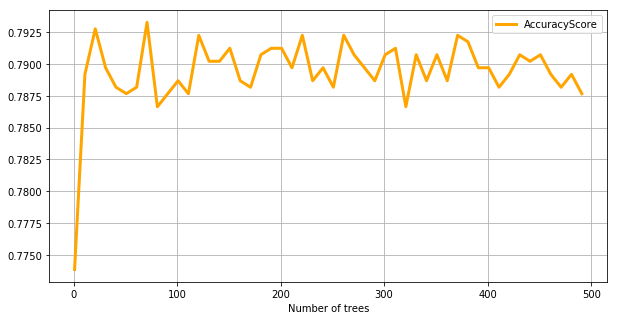

In [96]:
result_df.plot(x='Number of trees', y='AccuracyScore', figsize=(10,5), grid=True, lw=3, color='orange')

As can be seen above, adding more trees provides a better classification accuracy on average. However, this doe not mean that adding more tress will necessarily always result in a better accuracy depending on the cross validation population.

### Gradient Boosted Trees

Each tree is built based on learnings of the previous tree

Each tree is trained using a different subset of data. However, the Boosting + Gradient Descent techniques are used to pool the subsets. After the bootstrap for one tree, Gradient Descent adjusts the probability of a data point being in the next training set and this continues sequentially. In this context, while the first bootstrap is based on uniform sampling the next one is modified based on what was learned from the previous three classification results. Data points that are classified correctly get lower weight for the next bootstrap. In this way, the likelihood of picking data that are not classified with previous tree increases. Finally, each tree is given a different weight for the final weighting for the majority rule decision.

I random forest, there is a "democracy" that all trees have the same voting weights. However, in the gradient boosted approach, trees that have a better performance/accuracy get a higher weight. Gradient descent is one of the technique that can be used to quantify the probability of choosing a data point in the train subset based on the result of the previous tree.


For window installation:

```shell
conda install -c anaconda py-xgboost
```

A rule of thumb is to use a lower number of tree when dealing with a small training data set. 

In [64]:
from xgboost.sklearn import XGBClassifier

In [65]:
clf = XGBClassifier()
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

- colsample_bylevel: Fraction of features used by each tree

- learning_rate: Controls the probability manipulation of data records based on the previous tree. Increasing this factor results in an increased focus on data records that were miss-classified.

- subsample: Fraction of the provided training data set used for each tree. Lowering this number results in a more distinct difference between training data sets used for each tree

- gamma: Minimum reduction in error to split the tree further

- n_estimators: Number of trees

In [66]:
clf.fit(X = train[['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender']], y=train[['Survival']])
predictions = clf.predict(test.drop(['Survival'], axis=1))
print('Accuracy : %.2f'%(accuracy_score(test['Survival'], predictions)))

Accuracy : 0.82


In [67]:
for feature, importance in zip(['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender'],clf.feature_importances_):
    print('Importance for {} : {:.3f}'.format(feature,importance))

Importance for Age : 0.629
Importance for Crew/Passenger : 0.057
Importance for Class : 0.221
Importance for Adult/Child : 0.000
Importance for Gender : 0.093


### Hyper Parameter Tuning

Considering the different parameters that affect the performance of a decision tree and also parameters that control the ensemble learning, there are many combinations that should be checked to find the best accuracy for the train/test data set. Hyper parameter tuning uses optimization technique to find an optimal combination.

In [68]:
# conda install -c jaikumarm hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [69]:
# provide the optimization range/population 
control = {
    'n_estimators': hp.quniform('n_estimators',100,1000,1)
    ,'learning_rate': hp.quniform('learning_rate', 0.1,0.4,0.1)
    ,'max_depth': hp.quniform('max_depth',1,15,1)
    ,'min_child_weight': hp.quniform('min_child_weight',1,6,1)
    ,'subsample': hp.quniform('subsample',0.5,1,0.05)
    ,'gamma': hp.quniform('gamma', 0.5,1,0.05)
    ,'colsample_bytree': hp.quniform('colsample_bytree',0.5,1,0.05)
    ,'nthread':5
    ,'silent':1              
}

In [70]:
def scorevalue(clf):
    X = train[['Age', 'Crew/Passenger', 'Class', 'Adult/Child', 'Gender']]
    y=train[['Survival']]
    return np.mean(cross_val_score(clf, X, y, cv=5).mean())

In [71]:
# Define a score that gets minimized and provides what you need
def score(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    clf = XGBClassifier(**params)
    return {'loss':1-scorevalue(clf), 'status':STATUS_OK}

In [72]:
trails=Trials()

In [73]:
best_param_set = fmin(score,control,algo=tpe.suggest,trials=trails,max_evals=250)

In [74]:
print('Optimized parameters: ')
for key, value in best_param_set.items():
    print('{} = {}'.format(key,value))

Optimized parameters: 
colsample_bytree = 1.0
gamma = 1.0
learning_rate = 0.2
max_depth = 10.0
min_child_weight = 5.0
n_estimators = 583.0
subsample = 1.0


In [75]:
print('Optimized Accuracy: {:.3f}'.format(1-score(best_param_set)['loss']))

Optimized Accuracy: 0.816
